In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import bz2
pd.set_option('display.max_columns', None)

0 1000000
1 1000000
2 1000000
3 1000000
4 1000000
5 1000000
6 1000000
7 1000000
8 1000000
9 1000000
10 1000000
11 1000000
12 1000000
13 1000000
14 1000000
15 1000000
16 1000000
17 1000000
18 1000000
19 1000000
20 390198


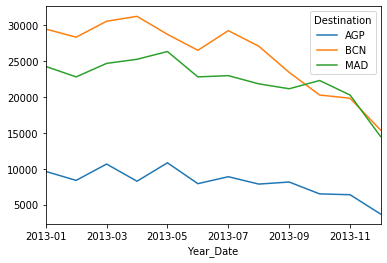

In [60]:
bi=pd.read_csv('/home/asanchorf6/PythonMaster/RetoAmadeus/searches.csv.bz2', sep='^', 
               usecols=['Date','Destination'], chunksize=1000000)

all_chunks=pd.DataFrame()

for i,b in enumerate(bi):
    print(i, len(b))
    b=b.dropna()
    b=b[b['Destination'].isin(['MAD', 'BCN', 'AGP'])]
    b['Year_Date']=b['Date'].str[0:7]
    result_chunk=b.groupby(['Year_Date', 'Destination']).count().reset_index()
    all_chunks=all_chunks.append(result_chunk)

result_all=all_chunks.groupby(['Year_Date', 'Destination']).sum().reset_index()

result_all=result_all.rename(columns={'Date':'Count'})
plot_ready=result_all.pivot('Year_Date','Destination','Count')
plot_ready.plot()

In [61]:
  result_all

,Year_Date,Destination,Count
0,2013-01,AGP,9633
1,2013-01,BCN,29469
2,2013-01,MAD,24258
3,2013-02,AGP,8379
4,2013-02,BCN,28329
5,2013-02,MAD,22800
6,2013-03,AGP,10659
7,2013-03,BCN,30552
8,2013-03,MAD,24681
9,2013-04,AGP,8265


AttributeError: 'DataFrame' object has no attribute 'Year_date'

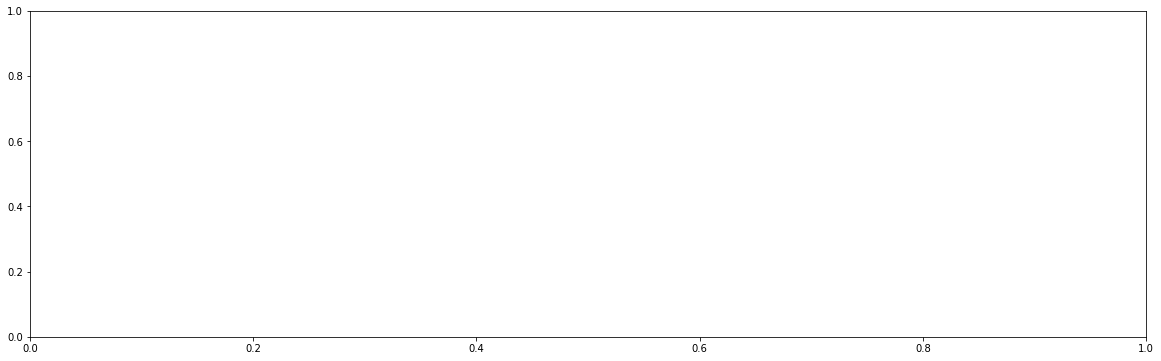

In [56]:
fig, ax = plt.subplots(figsize=(20, 6))

mad = result_all[result_all.Destination == 'MAD']
bcn = result_all[result_all.Destination == 'BCN']
agp = result_all[result_all.Destination == 'AGP']

ax.plot(mad.Year_date, mad.Count, label='Madrid')
ax.plot(bcn.Year_date, bcn.Count, label='Barcelona')
ax.plot(agp.Year_date, agp.Count, label='Málaga')

ax.legend()

plt.show()